<a href="https://colab.research.google.com/github/Izect/CSST-102-3A/blob/main/CS3A-TEA%C3%91O-EXER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset

In [2]:
df = pd.read_csv('customer_segmentation.csv')


# Display the first rows

In [5]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [4]:
df.fillna(df.mean(), inplace=True)

Text(0.5, 1.0, 'Age Distribution')

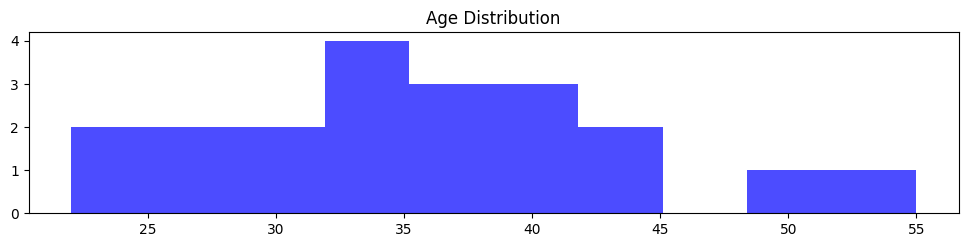

In [8]:
# Explore the distribution of features using histograms
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income Distribution')

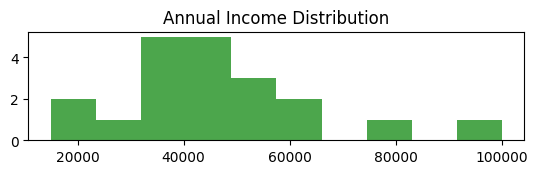

In [9]:
plt.subplot(3, 1, 2)
plt.hist(df['AnnualIncome'], bins=10, color='green', alpha=0.7)
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

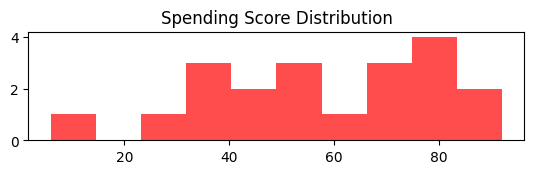

In [10]:
plt.subplot(3, 1, 3)
plt.hist(df['SpendingScore'], bins=10, color='red', alpha=0.7)
plt.title('Spending Score Distribution')

# Normalize the numerical columns

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])


# Implement K-means clustering

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Elbow Method to determine the optimal number of clusters

In [15]:
inertia = []
ks = range(2, 6)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

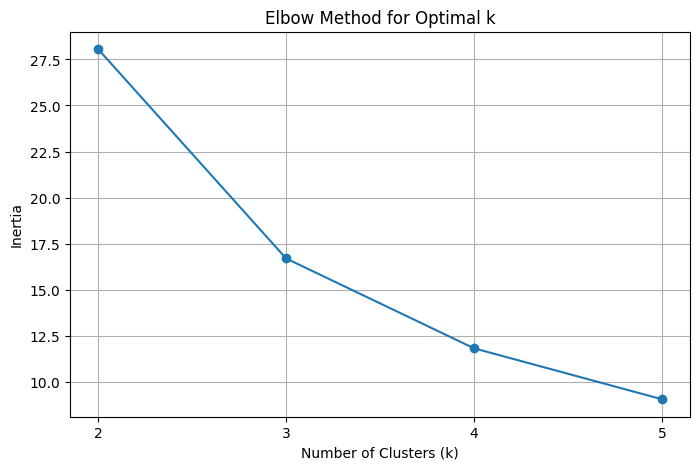

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(ks, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid()
plt.show()

# Visualize the clusters

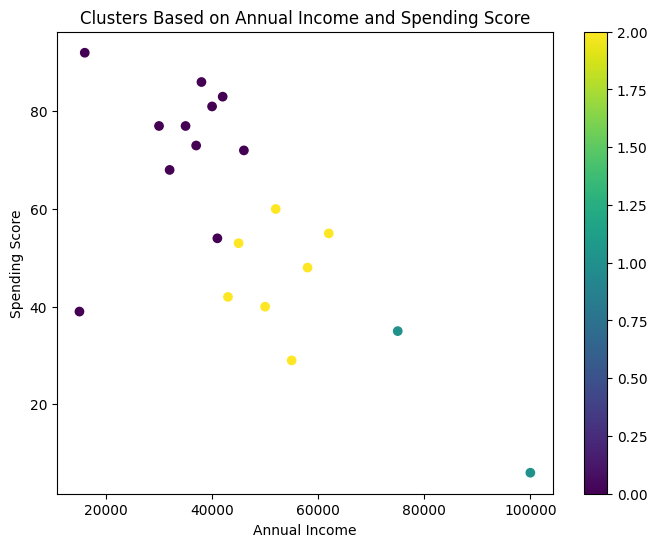

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters Based on Annual Income and Spending Score')
plt.colorbar()
plt.show()

# Silhouette Score

In [19]:
silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

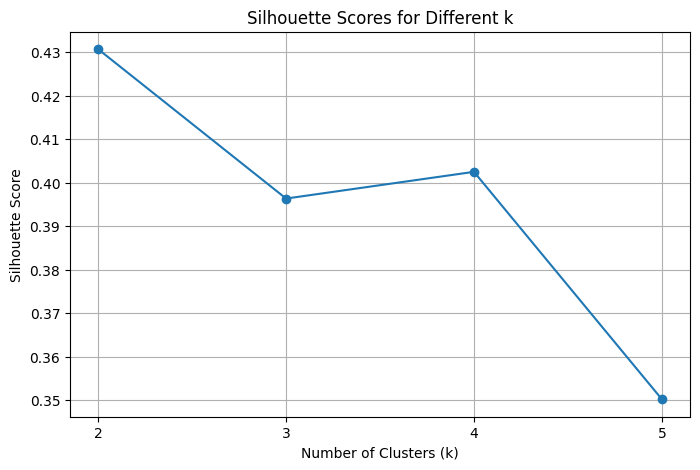

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.grid()
plt.show()

# Calculate the mean Spending Score for each cluster

In [23]:
cluster_spending_score = df.groupby('Cluster')['SpendingScore'].mean()

# Print the average Spending Score for each cluster

In [24]:
print("Average Spending Score for each cluster:")
for cluster, score in cluster_spending_score.items():
    print(f"Cluster {cluster}: {score:.6f}")

Average Spending Score for each cluster:
Cluster 0: 72.909091
Cluster 1: 20.500000
Cluster 2: 46.714286
